In [326]:
import scipy

import numpy as np

from rich import print
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

import random

In [327]:
def convert_csc_matrix_to_array(boundary_csc_matrix: scipy.sparse._csc.csc_matrix) -> np.array:
    
    idx = 0
    final_boundary = 0
    for boundary in boundary_csc_matrix:
        boundary = boundary[0].toarray()
        if boundary.max() == 0:
            continue
        boundary[boundary > 0] = idx + 1
        final_boundary += boundary
        idx += 1
        
    return final_boundary


def read_mat_format(src_dir: str):
    
    random.seed(2)
    
    # Find all images with .jpg extension in 
    pathes_to_images = list(Path(src_dir, "img").glob("*.jpg"))
    
    # choise random sample from all images
    path_to_img = random.choice(pathes_to_images)
    path_to_inst = Path(src_dir, "inst", path_to_img.stem + ".mat")
    path_to_cls = Path(src_dir, "cls", path_to_img.stem + ".mat")
    
    # Read img and convert from BGR to RGB
    img = cv2.imread(str(path_to_img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # read inst and cls files
    mat_inst = scipy.io.loadmat(path_to_inst) 
    mat_cls = scipy.io.loadmat(path_to_cls)
    
    # Extract masks from mat_inst and mat_cls arrays
    mask_inst = mat_inst["GTinst"]["Segmentation"][0][0]
    mask_cls = mat_cls["GTcls"]["Segmentation"][0][0]
    
    # Extract boundary each object
    boundary_inst = [i for i in mat_inst["GTinst"]["Boundaries"][0][0]]
    boundary_cls = [i for i in mat_cls["GTcls"]["Boundaries"][0][0]]
    
    # Convert each boundary from scipy.sparse._csc.csc_matrix to np.array
    final_boundary_inst_image = convert_csc_matrix_to_array(boundary_inst)
    final_boundary_cls_image = convert_csc_matrix_to_array(boundary_cls)
    
    # plot original image, segmentation mask_inst and segmentation mask_cls
    fig = plt.figure(figsize=(16,9))
    axes = fig.subplots(nrows=2, ncols=3)
    axes[0, 0].imshow(img)
    axes[1, 0].imshow(img)
    axes[0, 1].imshow(mask_inst, cmap='jet')
    axes[0, 2].imshow(mask_cls, cmap='jet')
        
    # plot results
    axes[1, 1].imshow(final_boundary_inst_image, cmap='jet')
    axes[1, 2].imshow(final_boundary_cls_image, cmap='jet')
    
    axes[0, 0].set_title("Original image", fontsize=18)
    axes[0, 1].set_title("Mask inst", fontsize=18)
    axes[0, 2].set_title("Mask cls", fontsize=18)
    
    axes[1, 0].set_title("Original image", fontsize=18)
    axes[1, 1].set_title("Boundary inst", fontsize=18)
    axes[1, 2].set_title("Boundary cls", fontsize=18)
    
    plt.show()
    
    print("[red]Mat inst: ", mat_inst, "\n\n")
    print("[red]Mat cls: ", mat_cls)

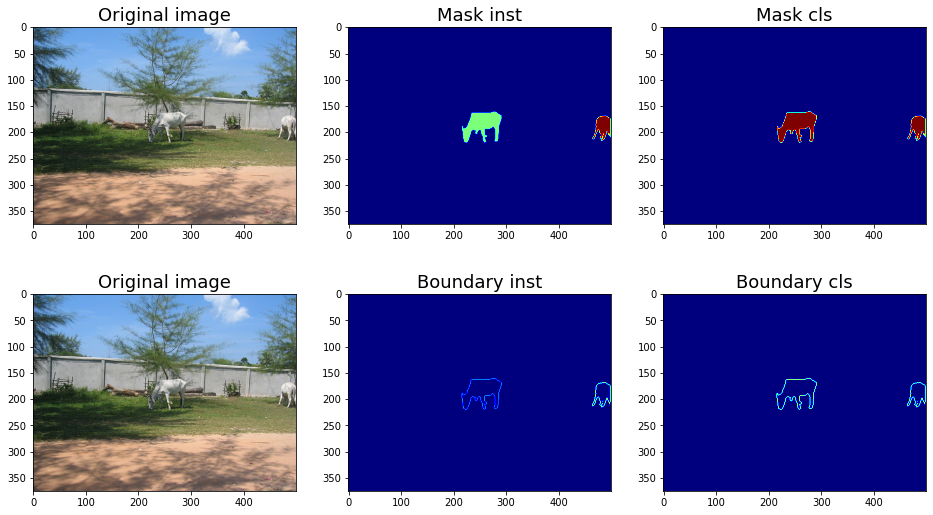

Mat inst: 
{
    '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan  8 03:40:18 
2012',
    '__version__': '1.0',
    '__globals__': [],
    'GTinst': array([[(array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[<375x500 sparse matrix of type
'<class 'numpy.uint8'>'
                        with 325 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 175 stored elements in Compressed Sparse Column format>]],
              dtype=object), array([[10],
               [10]], dtype=uint8))                                                          
]],
      dtype=[('Segmentation', 'O'), ('Boundaries', 'O'), ('Categories', 'O')])
}

Mat cls: 
{
    '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan  8 03:40:18 
2012',
    '__version__': '1.0',
    '__globals__': [],
    'GTcls': array([[(array([[<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 500 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>],
               [<375x500 sparse matrix of type '<class 'numpy.uint8'>'
                        with 0 stored elements in Compressed Sparse Column format>]],
              dtype=object), array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[10]], dtype=uint8))]],
      dtype=[('Boundaries', 'O'), ('Segmentation', 'O'), ('CategoriesPresent', 'O')])
}

In [328]:
read_mat_format("/Users/vladislavefremov/Disk/Vlad/Job/Lab/Priroda/Datasets/\
benchmark_RELEASE/dataset_small")